**NOTE:** Add parent directory to path so it can import those modules

In [1]:
import os
import sys

parent = os.path.dirname(os.path.realpath('.'))
sys.path.append(parent)
  
import utils, plots

In [2]:
# Fix paths since they are set from the upper level directory
path_to_known='../data/kepler.csv'
path_to_sample='../data/sara_revised.csv'
path_to_dists='../data/distributions/dteff_100_K_dlogg_0.1_dex/*' # make sure it ends with the star because this is used in glob
path_to_save='../plots/'

## Single star
if it's for one, just make them list-like
(because this is optimized for command line - which will append values to a list)

In [3]:
prot = utils.get_periods(teff=[5777.], logg=[4.4], path_to_known=path_to_known)
print(prot)

[44.64203823]


## An ensemble of stars
### Option 1: directly provide the teff and logg arrays

In [4]:
teff = [5250., 5777., 5250., 5858., 6000.]
logg = [4.6, 4.4, 4.5, 4.3, 4.2]

prot = utils.get_periods(teff=teff, logg=logg, path_to_known=path_to_known)
print(prot)

[12.89855953 16.70991155 36.02176886 17.32457192  2.96500709]


### Option 2: read in sample csv

In [5]:
# teff and logg are now both `None` by default so there is an option to provide a file name instead
# FYI: for this version (i.e. utils.get_periods), it does not automatically overwrite to the csv

prot = utils.get_periods(path_to_known=path_to_known, path_to_sample=path_to_sample)
print(prot)

[ 3.253643    1.04116767  4.4587572  ... 10.09841257  7.0530778
  7.35656314]


The printed array looks longer than any we've provided so far in the notebook. 

Let's print the length to see if it seems right given the size of the input csv

In [6]:
print(len(prot))

1618


## Let's make some plots!

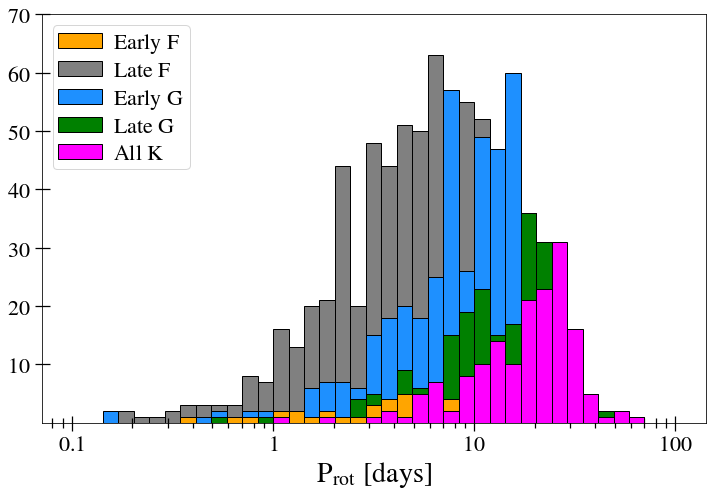

In [7]:
# We have to set save to `False` in the notebook because it will get cranky
# and provide an error that the path to save the figure to does not exist

plots.rotation_hists(path_to_save=path_to_save, path_to_sample=path_to_sample)

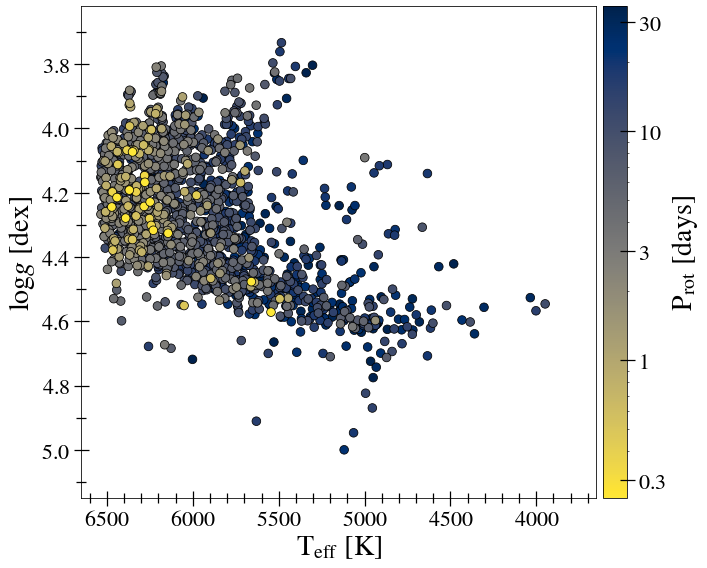

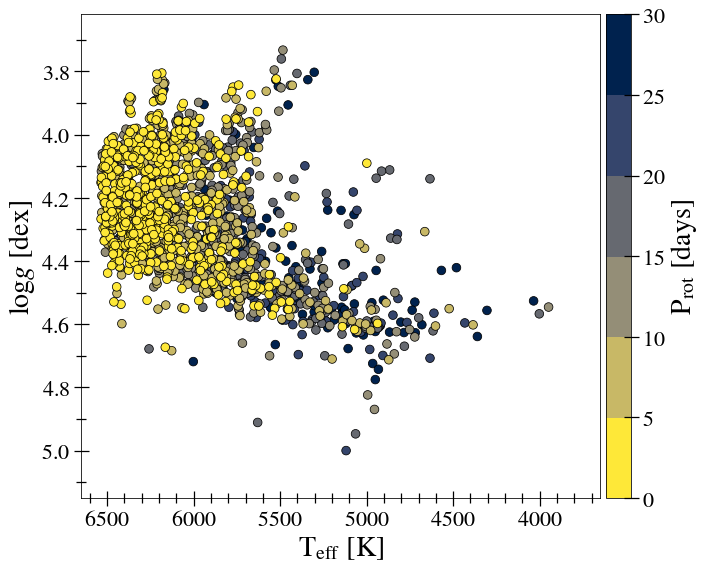

In [8]:
plots.rotation_hrdiagram(path_to_save=path_to_save, path_to_sample=path_to_sample)

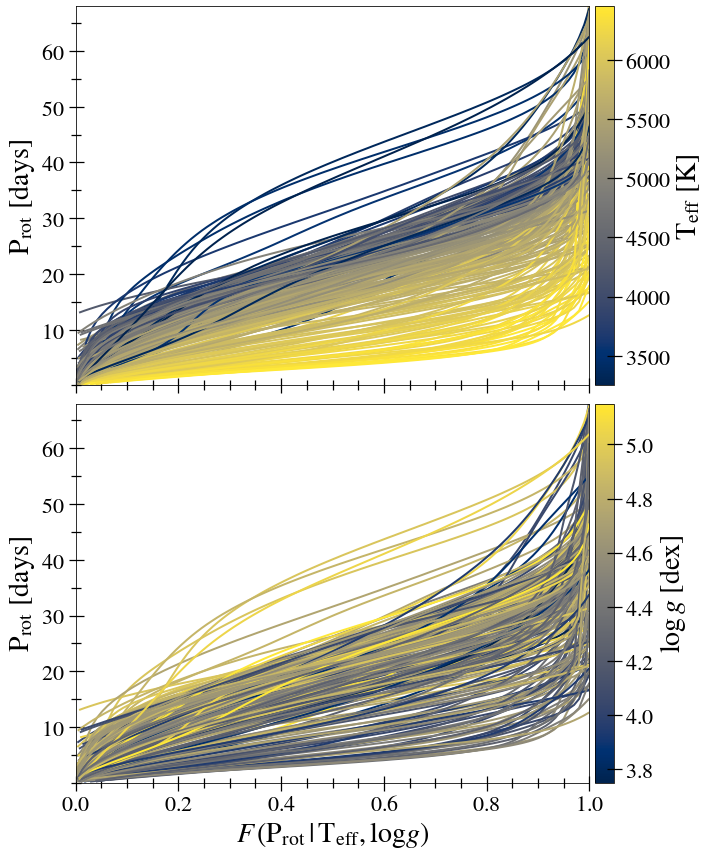

In [9]:
plots.ensemble_plot(path_to_save=path_to_save, path_to_dists=path_to_dists)

You can also plot a single ensemble figure, specifying either 'teff' or 'logg'
aka which to use for the colorbar

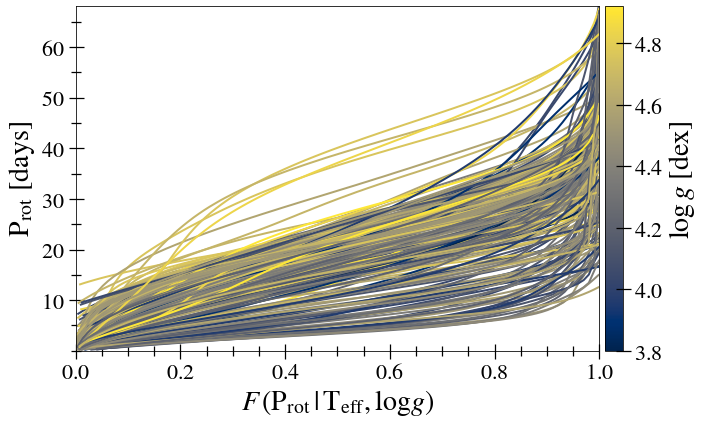

In [10]:
plots.ensemble_plot(double=False, which='logg', path_to_save=path_to_save, path_to_dists=path_to_dists,)

If you want `teff`, you can leave it out since that's the default (if a single figure is desired)

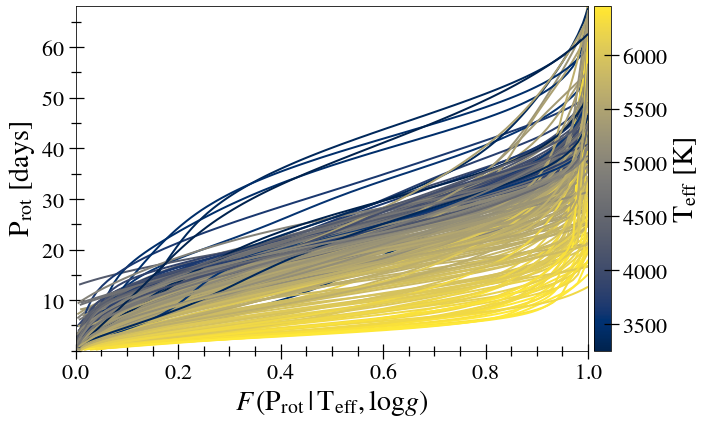

In [11]:
plots.ensemble_plot(double=False, path_to_save=path_to_save, path_to_dists=path_to_dists,)

In [12]:
# I added a convenient module that makes all the plots in: 
# plots.make_all(path_to_save=path_to_save, path_to_sample=path_to_sample, path_to_known=path_to_known, path_to_dists=path_to_dists)
# NOTE: make sure you provide all the keyword arguments if running from this notebook directory